# Cluster

In [1]:
import pandas as pd
import numpy as np

In [2]:
readPath = './Data2/NewData.csv'
PDData = pd.read_csv(readPath)

# silhouette_score
silhouette_score
側影函數 (Silhouette) 是一種解釋和驗證數據集群內一致性的方法。
該技術為每個對象的分類情況提供了簡潔的圖形表示。
輪廓值是對象與其自己的聚類相比於其他聚類的相似程度的度量。
輪廓範圍從-1到+1，其中較高的值表示對象與其自身的聚類匹配良好，而與相鄰的聚類匹配不良。

# davies_bouldin_score
Davies–Bouldin Index 是評估聚類算法的指標。這是一種內部評估方案，
在該方案中，將使用數據集固有的數量和特徵來驗證進行聚類的程度。
其中較低的Davies-Bouldin Idex與具有更好群集分離度的模型有關。

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
def MeasureEvaluate(Data, ClusterFun, Min, Max, MeasureFun):
    MeasureAvg = []
    bestNum = 0
    MaxScore = 0
    MinScore = 99
    for Num_Clusters in range(Min, Max, 1):
        #----------------------------------------
        # ClusterFun
        if(ClusterFun == 'kmeans'):
            Model = KMeans(n_clusters = Num_Clusters)
            y_pred = Model.fit_predict(Data)
        elif(ClusterFun == 'AgglomerativeClustering'):
            Model = AgglomerativeClustering(n_clusters = Num_Clusters)
            y_pred = Model.fit_predict(Data)
        elif(ClusterFun == 'DBSCAN'):
            Model = DBSCAN(eps = Num_Clusters/10)
            y_pred = Model.fit_predict(Data)
        elif(ClusterFun == 'Birch'):
            Model = Birch(n_clusters = Num_Clusters)
            y_pred = Model.fit_predict(Data)
        elif(ClusterFun == 'GaussianMixture'):
            Model = GaussianMixture(n_components = Num_Clusters)
            y_pred = Model.fit_predict(Data)
        #----------------------------------------
        
        #----------------------------------------
        # MeasureFun
        if(MeasureFun == 'silhouette_score'):
            Score = silhouette_score(Data, y_pred)
            if(Score > MaxScore):
                bestNum = Num_Clusters
                MaxScore = Score
        elif(MeasureFun == 'davies_bouldin_score'):
            Score = davies_bouldin_score(Data, y_pred)
            if(Score < MinScore):
                bestNum = Num_Clusters
                MinScore = Score
        MeasureAvg.append(Score)
        #----------------------------------------
        
        print(Num_Clusters, Score)
        
    fig1, ax1 = plt.subplots()
    ax1.plot(range(Min, Max, 1), MeasureAvg)
    return bestNum
    
# def SSEEvaluate(Data, ClusterFun, Min, Max):
#     SSEAvg = []
#     for Num_Clusters in range(Min, Max, 1):
#         if(ClusterFun == 'kmeans'):
#             kmeans = KMeans(n_clusters = Num_Clusters)
#             kmeans.fit(Data)
#             y_kmeans = kmeans.predict(Data)
#             Score = kmeans.inertia_
#             SSEAvg.append(Score)
#             print(Num_Clusters, Score)
#     fig1, ax1 = plt.subplots()
#     ax1.plot(range(Min, Max, 1), SSEAvg)

def ExcuteCluster(Data, ClusterFun, Num_Clusters):
    if(ClusterFun == 'kmeans'):
        Model = KMeans(n_clusters = Num_Clusters)
        y_pred = Model.fit_predict(Data)
    elif(ClusterFun == 'AgglomerativeClustering'):
        Model = AgglomerativeClustering(n_clusters = Num_Clusters)
        y_pred = Model.fit_predict(Data)
    elif(ClusterFun == 'DBSCAN'):
        Model = DBSCAN(eps = Num_Clusters/10)
        y_pred = Model.fit_predict(Data)
    elif(ClusterFun == 'Birch'):
        Model = Birch(n_clusters = Num_Clusters)
        y_pred = Model.fit_predict(Data)
    elif(ClusterFun == 'GaussianMixture'):
        Model = GaussianMixture(n_components = Num_Clusters)
        y_pred = Model.fit_predict(Data)
    Data['Group'] = y_pred
    return Data

import numpy as np
def DataFrameConvert(Data, KeyWord):
    ListColumns = list(Data.columns)
    ListColumns.remove(KeyWord)
    ListColumns.insert(0, 'Number')
    NewData = pd.DataFrame(data = ListColumns, columns = ['Columns'])
#     --------------------------------
# Full Data
    TotalNum = len(Data)
    Temp = Data.sum(axis = 0, skipna = True)
    Temp = Temp.drop(labels=[KeyWord])
    Temp = Temp.values / TotalNum
    Temp = np.insert(Temp, 0, TotalNum)
    NewData['Full Data'] = Temp
#     --------------------------------
    KeyList = list(Data[KeyWord].unique())
    KeyList.sort()
    for Key in KeyList:
        TotalNum = len(Data[Data[KeyWord] == Key])
        Temp = Data[Data[KeyWord] == Key].sum(axis = 0, skipna = True)
        Temp = Temp.drop(labels=[KeyWord])
        Temp = Temp.values / TotalNum
        Temp = np.insert(Temp, 0, TotalNum)
        ColValue = Temp
        NewData[Key] = ColValue
#     --------------------------------
    return NewData

# Partitioning - KMeans
K-平均演算法（英文：k-means clustering）源於訊號處理中的一種向量量化方法，
現在則更多地作為一種聚類分析方法流行於資料探勘領域。
k-平均聚類的目的是：把n個點（可以是樣本的一次觀察或一個實例）劃分到k個聚類中，
使得每個點都屬於離他最近的均值（此即聚類中心）對應的聚類，以之作為聚類的標準。

-----------------------------------------------------------------
2 2.09935191144594
3 1.8992485914932875
4 1.7583934443737759
5 1.7437168323968304
6 1.8957093660308202
7 1.9455874293217836
8 2.113873359165133
9 2.035540617671184
10 1.9964951158816135
kmeans  bestNumber ：  5
               Columns      Full Data             0             1  \
0               Number  378661.000000  89313.000000  35730.000000   
1      main_category_0       0.237278      0.232956      0.236076   
2      main_category_1       0.133874      0.155565      0.151078   
3      main_category_2       0.093041      0.054259      0.052785   
4      main_category_3       0.362316      0.365333      0.478366   
5      main_category_4       0.087479      0.107957      0.060397   
6      main_category_5       0.086011      0.083930      0.021299   
7           currency_0       0.219975      0.000000      0.000000   
8           currency_1       0.780025      1.000000      1.000000   
9              state_0       0.124

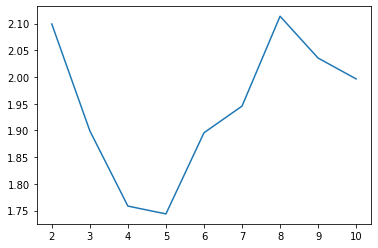

In [4]:
MinNum = 2
MaxNum = 11
NewData = pd.DataFrame(PDData.values, columns=PDData.columns)
# print(NewData.head())
print('-----------------------------------------------------------------')
ClusterFun = 'kmeans'
MeasureFun = 'davies_bouldin_score'#silhouette_score, davies_bouldin_score
bestNum = MeasureEvaluate(NewData, ClusterFun, MinNum, MaxNum, MeasureFun)
print(ClusterFun, ' bestNumber ： ', bestNum)
NewData = ExcuteCluster(NewData, ClusterFun, bestNum)
ConvData = DataFrameConvert(NewData, 'Group')
print(ConvData)
print('-----------------------------------------------------------------')

In [5]:
pd.set_option('expand_frame_repr', False)
bestNum = 5
ClusterFun = 'kmeans'
NewData = pd.DataFrame(PDData.values, columns=PDData.columns)
NewData = ExcuteCluster(NewData, ClusterFun, bestNum)
ConvData = DataFrameConvert(NewData, 'Group')
print(ConvData)

               Columns      Full Data             0             1             2             3             4
0               Number  378661.000000  84812.000000  92452.000000  86341.000000  35812.000000  79244.000000
1      main_category_0       0.237278      0.266637      0.209406      0.228999      0.236373      0.247804
2      main_category_1       0.133874      0.115668      0.119922      0.152986      0.151513      0.140843
3      main_category_2       0.093041      0.124923      0.116287      0.052617      0.053334      0.093786
4      main_category_3       0.362316      0.287294      0.405129      0.372396      0.477270      0.329728
5      main_category_4       0.087479      0.075638      0.081156      0.108129      0.060259      0.097332
6      main_category_5       0.086011      0.129840      0.068100      0.084873      0.021250      0.090505
7           currency_0       0.219975      0.982125      0.000000      0.000000      0.000000      0.000000
8           currency_1      

# GaussianMixture
為單一高斯概率密度函數的延伸，用多個高斯概率密度函數（常態分布曲線）精確地量化變量分布，
是將變量分布分解為若干基於高斯概率密度函數（常態分布曲線）分布的統計模型。

-----------------------------------------------------------------
2 2.2578711810314553
3 3.3298364879183118
4 2.6907584164760308
5 1.8928356324465363
6 1.9569910379112232
7 2.27588394361223
8 2.4537345565085045
9 1.9731108477442563
10 1.9739494689355017
GaussianMixture  bestNumber ：  5
               Columns      Full Data              0             1  \
0               Number  378661.000000  106715.000000  61012.000000   
1      main_category_0       0.237278       0.234400      0.232381   
2      main_category_1       0.133874       0.149820      0.080001   
3      main_category_2       0.093041       0.062456      0.125926   
4      main_category_3       0.362316       0.348742      0.328132   
5      main_category_4       0.087479       0.104709      0.102193   
6      main_category_5       0.086011       0.099873      0.131368   
7           currency_0       0.219975       0.000000      0.000000   
8           currency_1       0.780025       1.000000      1.000000   
9            

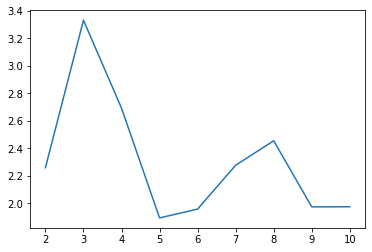

In [6]:
MinNum = 2
MaxNum = 11
NewData = pd.DataFrame(PDData.values, columns=PDData.columns)
# print(NewData.head())
print('-----------------------------------------------------------------')
ClusterFun = 'GaussianMixture'
MeasureFun = 'davies_bouldin_score'#silhouette_score, davies_bouldin_score
bestNum = MeasureEvaluate(NewData, ClusterFun, MinNum, MaxNum, MeasureFun)
print(ClusterFun, ' bestNumber ： ', bestNum)
NewData = ExcuteCluster(NewData, ClusterFun, bestNum)
ConvData = DataFrameConvert(NewData, 'Group')
print(ConvData)
print('-----------------------------------------------------------------')

In [7]:
pd.set_option('expand_frame_repr', False)
bestNum = 5
ClusterFun = 'GaussianMixture'
NewData = pd.DataFrame(PDData.values, columns=PDData.columns)
NewData = ExcuteCluster(NewData, ClusterFun, bestNum)
ConvData = DataFrameConvert(NewData, 'Group')
print(ConvData)

               Columns      Full Data             0              1             2             3             4
0               Number  378661.000000  38532.000000  156274.000000  49944.000000  66298.000000  67613.000000
1      main_category_0       0.237278      0.240579       0.238626      0.237846      0.255965      0.213539
2      main_category_1       0.133874      0.151381       0.149558      0.134030      0.114845      0.106193
3      main_category_2       0.093041      0.070383       0.069941      0.148246      0.105720      0.106133
4      main_category_3       0.362316      0.436261       0.353654      0.322481      0.309240      0.421664
5      main_category_4       0.087479      0.066205       0.103293      0.069298      0.082853      0.081020
6      main_category_5       0.086011      0.035192       0.084928      0.088099      0.131377      0.071451
7           currency_0       0.219975      0.000000       0.000000      0.395163      0.958702      0.000000
8           currenc

# Birch
BIRCH（英文全稱：balanced iterative reducing and clustering using hierarchies，中文：利用層次方法的平衡疊代規約和聚類）
是一個非監督式分層聚類算法，於1996年由 Tian Zhang 提出。
算法的優勢在於能夠利用有限的內存資源完成對大數據集的高質量的聚類。
該算法通過構建聚類特徵樹（Clustering Feature Tree，簡稱CF Tree），在接下來的聚類過程中，
直接對聚類特徵進行聚類，而無需對原始數據集進行聚類。
因此在多數情況下只需要掃描一次資料庫即可進行聚類，IO成本與數據集尺寸呈線性關係。

-----------------------------------------------------------------
2 2.027485515424476
3 2.184037690376394
4 2.059475201030065
5 2.302005978826638
6 2.3373943196962124
7 2.366929799311258
8 2.660285387594262
9 2.64087670113829
10 2.5315313178892085
Birch  bestNumber ：  2
               Columns      Full Data             0              1
0               Number  378661.000000  86014.000000  292647.000000
1      main_category_0       0.237278      0.262922       0.229741
2      main_category_1       0.133874      0.116911       0.138860
3      main_category_2       0.093041      0.123178       0.084183
4      main_category_3       0.362316      0.294382       0.382283
5      main_category_4       0.087479      0.074593       0.091267
6      main_category_5       0.086011      0.128014       0.073666
7           currency_0       0.219975      0.968400       0.000000
8           currency_1       0.780025      0.031600       1.000000
9              state_0       0.124085      0.182738       0

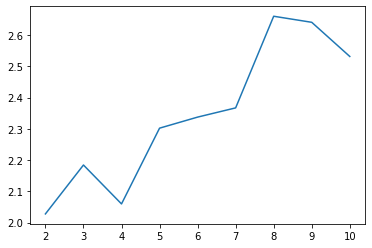

In [8]:
MinNum = 2
MaxNum = 11
NewData = pd.DataFrame(PDData.values, columns=PDData.columns)
# print(NewData.head())
print('-----------------------------------------------------------------')
ClusterFun = 'Birch'
MeasureFun = 'davies_bouldin_score'#silhouette_score, davies_bouldin_score
bestNum = MeasureEvaluate(NewData, ClusterFun, MinNum, MaxNum, MeasureFun)
print(ClusterFun, ' bestNumber ： ', bestNum)
NewData = ExcuteCluster(NewData, ClusterFun, bestNum)
ConvData = DataFrameConvert(NewData, 'Group')
print(ConvData)
print('-----------------------------------------------------------------')

In [9]:
pd.set_option('expand_frame_repr', False)
bestNum = 4
ClusterFun = 'Birch'
NewData = pd.DataFrame(PDData.values, columns=PDData.columns)
NewData = ExcuteCluster(NewData, ClusterFun, bestNum)
ConvData = DataFrameConvert(NewData, 'Group')
print(ConvData)

               Columns      Full Data              0             1             2             3
0               Number  378661.000000  292647.000000  31583.000000  31872.000000  22559.000000
1      main_category_0       0.237278       0.229741      0.279961      0.223896      0.294206
2      main_category_1       0.133874       0.138860      0.108254      0.126004      0.116184
3      main_category_2       0.093041       0.084183      0.143558      0.076368      0.160778
4      main_category_3       0.362316       0.382283      0.266567      0.349492      0.255463
5      main_category_4       0.087479       0.091267      0.073109      0.094848      0.048052
6      main_category_5       0.086011       0.073666      0.128550      0.129393      0.125316
7           currency_0       0.219975       0.000000      0.999747      0.914972      1.000000
8           currency_1       0.780025       1.000000      0.000253      0.085028      0.000000
9              state_0       0.124085       0.1068